##Experiment5: Synthia dataset trained on UNet Architecture

##Importing all the libraries and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Check if GPU is available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')

# Create a TensorFlow session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import random
import seaborn as sns
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Dropout, UpSampling2D, concatenate
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import os
import matplotlib.pyplot as plot
from PIL import Image
import cv2
import random
import seaborn as sns
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv2D, Activation, Add, Conv2DTranspose
from keras.applications.vgg16 import VGG16


In [ ]:
from PIL import Image
import os

# Path to the folders containing original and annotated images
original_folder = '/content/drive/MyDrive/SelectedDatasets/SynthiaOriginal'
annotated_folder = '/content/drive/MyDrive/SelectedDatasets/SynthiaAnnotated'

# Output folder to save the merged images
output_folder = '/content/drive/MyDrive/SelectedDatasets/JoinedImages'

# Get a list of filenames in the original image folder
original_filenames = os.listdir(original_folder)

# Iterate over the original images and merge with corresponding annotated image
for filename in original_filenames:
    original_path = os.path.join(original_folder, filename)
    annotated_path = os.path.join(annotated_folder, filename)
    
    # Open the original and annotated images
    original_image = Image.open(original_path)
    annotated_image = Image.open(annotated_path)
    
    # Resize the images to have the same height
    height = min(original_image.height, annotated_image.height)
    original_image = original_image.resize((int(original_image.width * height / original_image.height), height))
    annotated_image = annotated_image.resize((int(annotated_image.width * height / annotated_image.height), height))
    
    # Create a new image with double width for merging
    merged_image = Image.new('RGB', (original_image.width + annotated_image.width, height))
    
    # Paste the original and annotated images side by side
    merged_image.paste(original_image, (0, 0))
    merged_image.paste(annotated_image, (original_image.width, 0))
    
    # Save the merged image to the output folder
    merged_path = os.path.join(output_folder, filename)
    merged_image.save(merged_path)

    # Close the images
    original_image.close()
    annotated_image.close()

print("Image merging complete!")


Image merging complete!


In [ ]:
from PIL import Image
import os

# Path to the folders containing original and annotated images
original_folder = '/content/drive/MyDrive/SelectedDatasets/SynthiaOriginal'
annotated_folder = '/content/drive/MyDrive/SelectedDatasets/SynthiaAnnotated'

# Output folder to save the merged images
output_folder = '/content/drive/MyDrive/SelectedDatasets/CombinedImages'

# Get a list of filenames in the original image folder
original_filenames = os.listdir(original_folder)

# Initialize a set to store the unique class labels
class_labels = set()

# Iterate over the original images and merge with corresponding annotated image
for filename in original_filenames:
    original_path = os.path.join(original_folder, filename)
    annotated_path = os.path.join(annotated_folder, filename)
    
    # Open the original and annotated images
    original_image = Image.open(original_path)
    annotated_image = Image.open(annotated_path)
    
    # Resize the images to have the same height
    height = min(original_image.height, annotated_image.height)
    original_image = original_image.resize((int(original_image.width * height / original_image.height), height))
    annotated_image = annotated_image.resize((int(annotated_image.width * height / annotated_image.height), height))
    
    # Create a new image with double width for merging
    merged_image = Image.new('RGB', (original_image.width + annotated_image.width, height))
    
    # Paste the original and annotated images side by side
    merged_image.paste(original_image, (0, 0))
    merged_image.paste(annotated_image, (original_image.width, 0))
    
    # Save the merged image to the output folder
    merged_path = os.path.join(output_folder, filename)
    merged_image.save(merged_path)
    
    # Get size and other information about the merged image
    image_size = merged_image.size
    image_format = merged_image.format
    image_mode = merged_image.mode
    
    # Determine the unique class labels in the annotated part of the image
    annotated_pixels = annotated_image.crop((0, 0, annotated_image.width, height))
    unique_labels = set(annotated_pixels.getdata())
    class_labels.update(unique_labels)
    
    # Close the images
    original_image.close()
    annotated_image.close()

print("Image merging complete!")
print("Number of classes in the joined image folder:", len(class_labels))
print("Size of the merged images:", image_size)
print("Image format:", image_format)
print("Image mode:", image_mode)


In [ ]:
import random
import shutil

# Path to the combined image folder
combined_folder = '/content/drive/MyDrive/SelectedDatasets/CombinedImages'

# Output folders for train and validation sets
train_folder = '/content/drive/MyDrive/SelectedDatasets/train'
val_folder = '/content/drive/MyDrive/SelectedDatasets/val'

# Create train and validation folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Get a list of filenames in the combined image folder
combined_filenames = os.listdir(combined_folder)

# Shuffle the filenames randomly
random.shuffle(combined_filenames)

# Calculate the split index
split_index = int(0.7 * len(combined_filenames))  # 70% for training, 30% for validation

# Split the filenames into train and validation sets
train_filenames = combined_filenames[:split_index]
val_filenames = combined_filenames[split_index:]

# Move the images to their respective folders
for filename in train_filenames:
    source_path = os.path.join(combined_folder, filename)
    destination_path = os.path.join(train_folder, filename)
    shutil.move(source_path, destination_path)

for filename in val_filenames:
    source_path = os.path.join(combined_folder, filename)
    destination_path = os.path.join(val_folder, filename)
    shutil.move(source_path, destination_path)

# Print the number of images in the train and validation sets
print("Number of images in the train set:", len(train_filenames))
print("Number of images in the validation set:", len(val_filenames))


Number of images in the train set: 658
Number of images in the validation set: 282


In [ ]:
import random
import shutil
from PIL import Image
import os

# Path to the folders containing original and annotated images
original_folder = '/content/drive/MyDrive/SelectedDatasets/SynthiaOriginal'
annotated_folder = '/content/drive/MyDrive/SelectedDatasets/SynthiaAnnotated'

# Path to the combined image folder
combined_folder = '/content/drive/MyDrive/SelectedDatasets/combinedimages'

# Output folders for train and validation sets
train_folder = '/content/drive/MyDrive/SelectedDatasets/TRAIN'
val_folder = '/content/drive/MyDrive/SelectedDatasets/VAL'


In [ ]:
width = 256
height = 256
classes = 13
batch_size = 10
num_of_training_samples = len(os.listdir(train_folder)) 
num_of_testing_samples = len(os.listdir(val_folder))

In [ ]:
print("Number of images in the training dataset:", num_of_training_samples)
print("Number of images in the testing/validation dataset:", num_of_testing_samples)


Number of images in the training dataset: 658
Number of images in the testing/validation dataset: 282


First two merged images from the train folder:


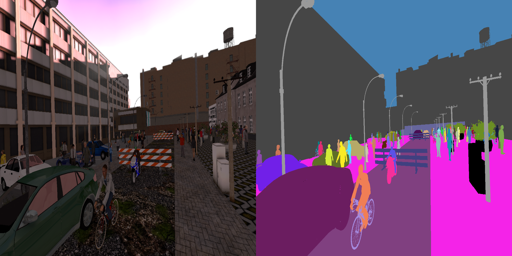

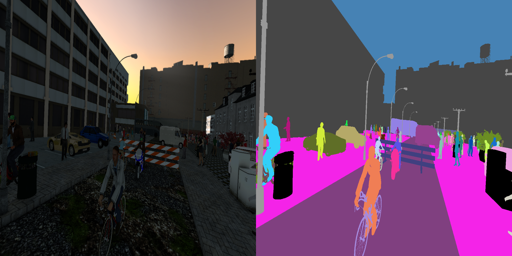

First two merged images from the validation folder:


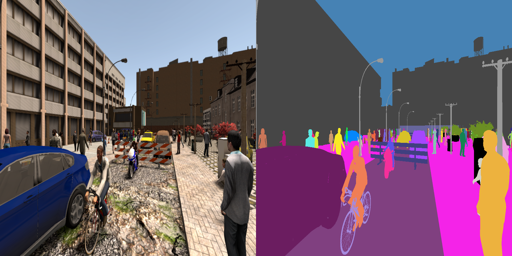

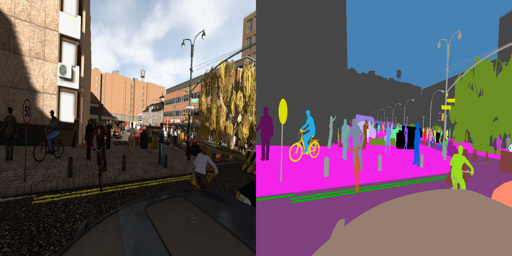

In [ ]:
# Function to display the first two merged images
def display_merged_images(folder):
    # Get a list of filenames in the folder
    filenames = os.listdir(folder)
    
    # Sort the filenames
    filenames.sort()
    
    # Iterate over the first two filenames
    for filename in filenames[:2]:
        # Get the path to the merged image
        image_path = os.path.join(folder, filename)
        
        # Open and display the image
        image = Image.open(image_path)
        image.show()
        image.close()

# Display the first two merged images from the train folder
print("First two merged images from the train folder:")
display_merged_images(train_folder)

# Display the first two merged images from the validation folder
print("First two merged images from the validation folder:")
display_merged_images(val_folder)



In [ ]:
import os
from PIL import Image

def resize_images(folder, width, height):
    # Get a list of filenames in the folder
    filenames = os.listdir(folder)
    
    # Iterate over the filenames
    for filename in filenames:
        # Get the path to the image
        image_path = os.path.join(folder, filename)
        
        # Open the image
        image = Image.open(image_path)
        
        # Resize the image
        resized_image = image.resize((width, height))
        
        # Save the resized image, overwriting the original image
        resized_image.save(image_path)
        
        # Close the image
        image.close()

# Resize images in the train folder
print("Resizing images in the train folder...")
resize_images(train_folder, 512, 256)

# Resize images in the val folder
print("Resizing images in the validation folder...")
resize_images(val_folder, 512, 256)

print("Image resizing complete!")


In [ ]:
# Function to display the size of images in a folder
def display_image_sizes(folder):
    # Get a list of filenames in the folder
    filenames = os.listdir(folder)
    
    # Sort the filenames
    filenames.sort()
    
    # Iterate over the filenames
    for filename in filenames:
        # Get the path to the image
        image_path = os.path.join(folder, filename)
        
        # Open the image and get its size
        image = Image.open(image_path)
        width, height = image.size
        
        # Print the filename, width, and height
        print(f"Image: {filename}, Width: {width}, Height: {height}")
        
        # Close the image
        image.close()

# Display the size of images in the train folder
print("Image sizes in the train folder:")
display_image_sizes(train_folder)

# Display the size of images in the validation folder
print("Image sizes in the validation folder:")
display_image_sizes(val_folder)

Image sizes in the train folder:
Image: image_1.png, Width: 512, Height: 256
Image: image_10.png, Width: 512, Height: 256
Image: image_100.png, Width: 512, Height: 256
Image: image_101.png, Width: 512, Height: 256
Image: image_104.png, Width: 512, Height: 256
Image: image_105.png, Width: 512, Height: 256
Image: image_106.png, Width: 512, Height: 256
Image: image_107.png, Width: 512, Height: 256
Image: image_108.png, Width: 512, Height: 256
Image: image_11.png, Width: 512, Height: 256
Image: image_110.png, Width: 512, Height: 256
Image: image_111.png, Width: 512, Height: 256
Image: image_113.png, Width: 512, Height: 256
Image: image_114.png, Width: 512, Height: 256
Image: image_115.png, Width: 512, Height: 256
Image: image_116.png, Width: 512, Height: 256
Image: image_117.png, Width: 512, Height: 256
Image: image_118.png, Width: 512, Height: 256
Image: image_119.png, Width: 512, Height: 256
Image: image_120.png, Width: 512, Height: 256
Image: image_121.png, Width: 512, Height: 256
Image

## Preprocessing the training and testing set

##Generator and other functions

In [ ]:
def LoadImage(name, path):
    img = Image.open(os.path.join(path, name))
    img = np.array(img)
    
    image = img[:,:256]
    mask = img[:,256:]
    
    return image, mask

In [ ]:
def bin_image(mask):
    bins = np.array([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240])
    new_mask = np.digitize(mask, bins)
    return new_mask

In [ ]:
def getSegmentationArr(image, classes, width=width, height=height):
    seg_labels = np.zeros((height, width, classes))
    img = image[:, : , 0]

    for c in range(classes):
        seg_labels[:, :, c] = (img == c ).astype(int)
    return seg_labels

In [ ]:
def give_color_to_seg_img(seg, n_classes=13):
    
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

In [ ]:
def DataGenerator(path, batch_size=10, classes=13):
    files = os.listdir(path)
    while True:
        for i in range(0, len(files), batch_size):
            batch_files = files[i : i+batch_size]
            imgs=[]
            segs=[]
            for file in batch_files:
                #file = random.sample(files,1)[0]
                image, mask = LoadImage(file, path)
                mask_binned = bin_image(mask)
                labels = getSegmentationArr(mask_binned, classes)

                imgs.append(image)
                segs.append(labels)

            yield np.array(imgs), np.array(segs)

In [ ]:
train_gen = DataGenerator(train_folder, batch_size=batch_size)
val_gen = DataGenerator(val_folder, batch_size=batch_size)

In [ ]:
imgs, segs = next(train_gen)
imgs.shape, segs.shape

((10, 256, 256, 3), (10, 256, 256, 13))

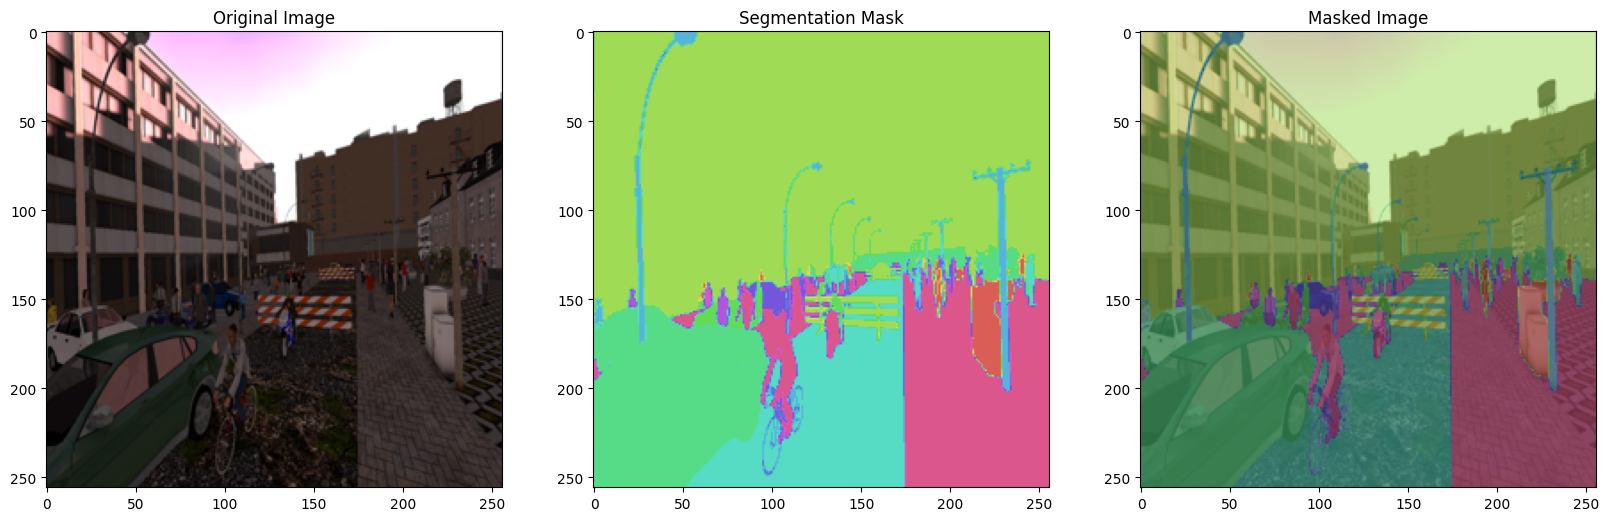

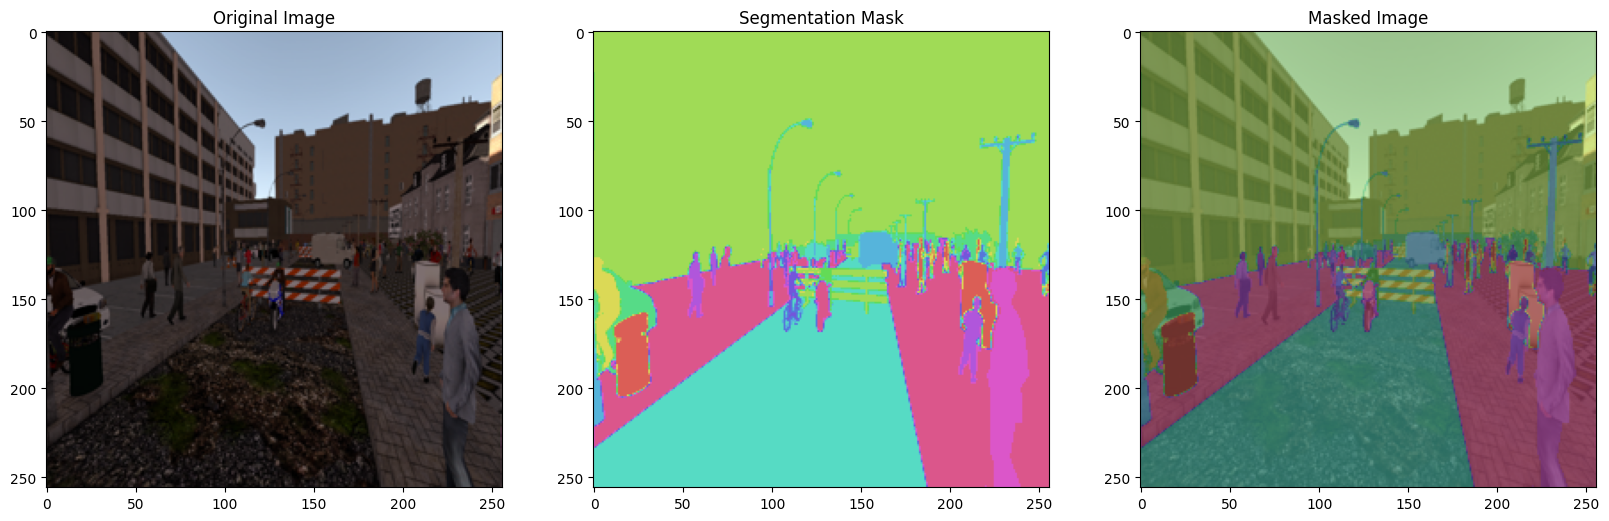

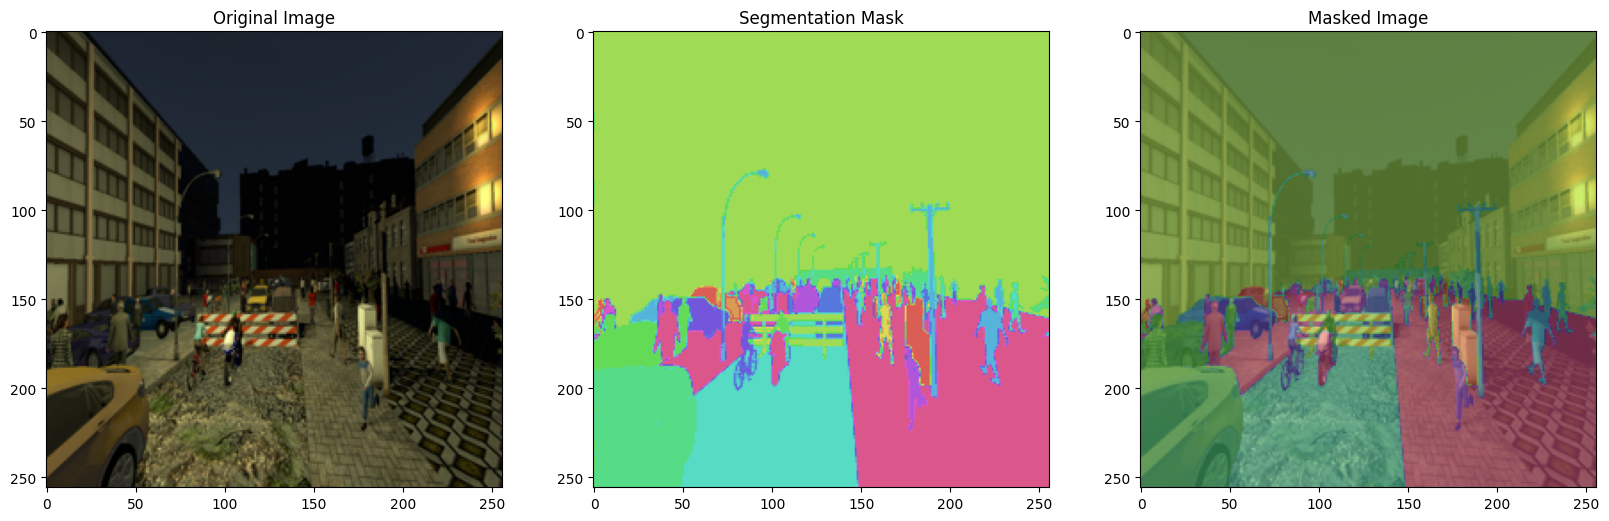

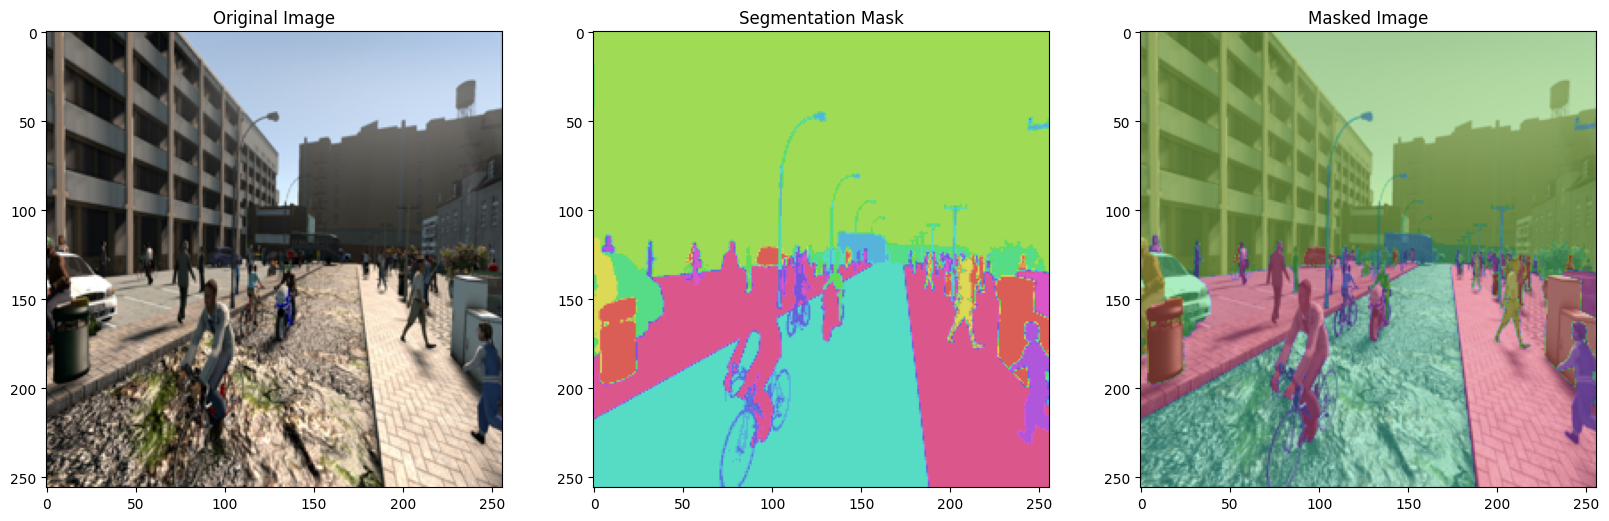

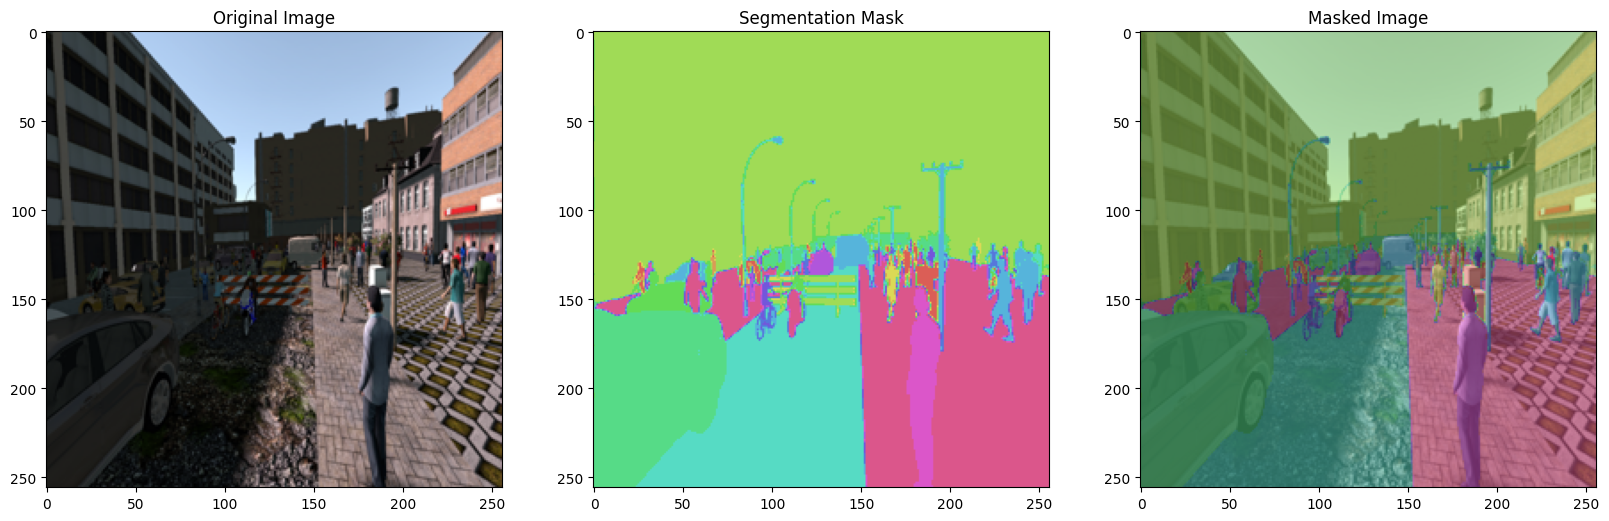

In [ ]:
import matplotlib.pyplot as plt
import cv2

num_images = 5

# Iterate over the first 5 images
for i in range(num_images):
    image = imgs[i]
    mask = give_color_to_seg_img(np.argmax(segs[i], axis=-1))
    masked_image = cv2.addWeighted(image/255, 0.5, mask, 0.5, 0)

    fig, axs = plt.subplots(1, 3, figsize=(20, 20))
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[1].imshow(mask)
    axs[1].set_title('Segmentation Mask')
    axs[2].imshow(masked_image)
    axs[2].set_title('Masked Image')
    plt.show()


##Training models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the U-Net model
def build_unet_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    # Expanding path
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(conv9)

    model = keras.Model(inputs, outputs)
    return model

In [ ]:
# Set up the model
input_shape = (width, height, 3)
num_classes = classes

model = build_unet_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath = "best-model-fcn.hdf5"


In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
history = model.fit(train_gen, epochs=10, steps_per_epoch=num_of_training_samples // batch_size,
                    validation_data=val_gen, validation_steps=num_of_testing_samples // batch_size,
                    callbacks=callbacks_list, use_multiprocessing=True)


Epoch 1/10
65/65 [==============================] - ETA: 0s - loss: 22.8276 - accuracy: 0.3848
Epoch 1: val_accuracy improved from -inf to 0.37853, saving model to best-model-fcn.hdf5
65/65 [==============================] - 110s 1s/step - loss: 22.8276 - accuracy: 0.3848 - val_loss: 1.9626 - val_accuracy: 0.3785
Epoch 2/10
65/65 [==============================] - ETA: 0s - loss: 1.8000 - accuracy: 0.4080
Epoch 2: val_accuracy improved from 0.37853 to 0.43192, saving model to best-model-fcn.hdf5
65/65 [==============================] - 76s 1s/step - loss: 1.8000 - accuracy: 0.4080 - val_loss: 1.7954 - val_accuracy: 0.4319
Epoch 3/10
65/65 [==============================] - ETA: 0s - loss: 1.5984 - accuracy: 0.5129
Epoch 3: val_accuracy improved from 0.43192 to 0.51589, saving model to best-model-fcn.hdf5
65/65 [==============================] - 88s 1s/step - loss: 1.5984 - accuracy: 0.5129 - val_loss: 1.6264 - val_accuracy: 0.5159
Epoch 4/10
65/65 [==============================] - ETA

In [ ]:
import pickle

# Save the history object to a file
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

import pickle

In [ ]:
# Load the history object from the file
with open('history.pkl', 'rb') as file:
    history = pickle.load(file)

# Access the training and validation metrics
loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


In [ ]:
# After training the model
model.save_weights("model_weights.h5")


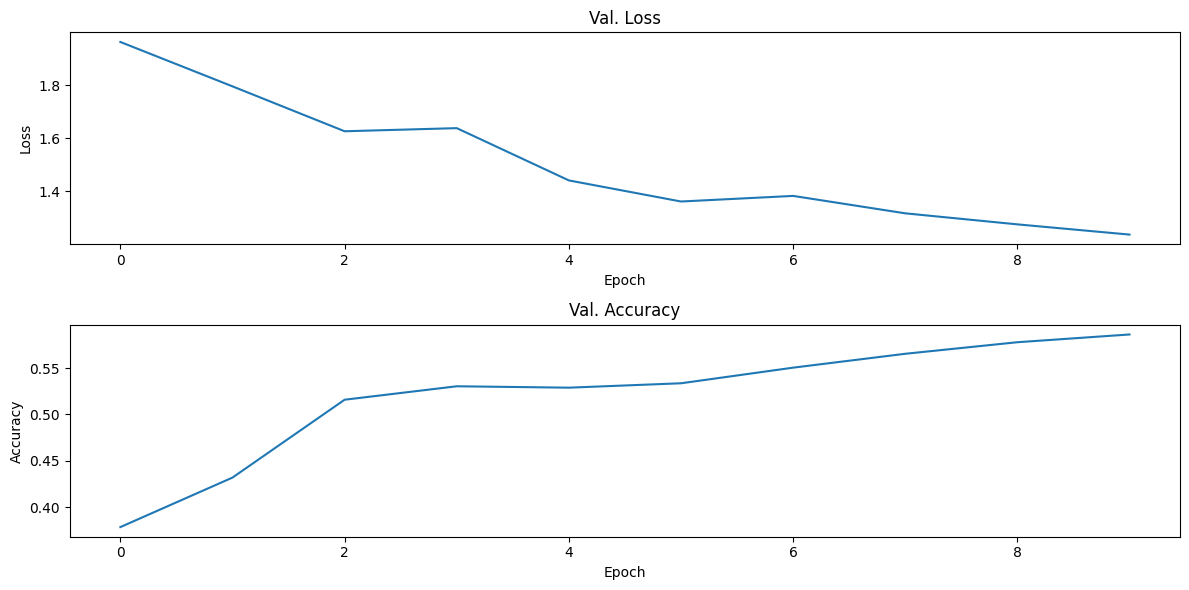

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.title("Val. Loss")
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(212)
plt.title("Val. Accuracy")
plt.plot(val_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.savefig("learn.png", dpi=150)
plt.show()


In [ ]:
model.load_weights("best-model-fcn.hdf5")

1/1 [==============================] - 0s 282ms/step


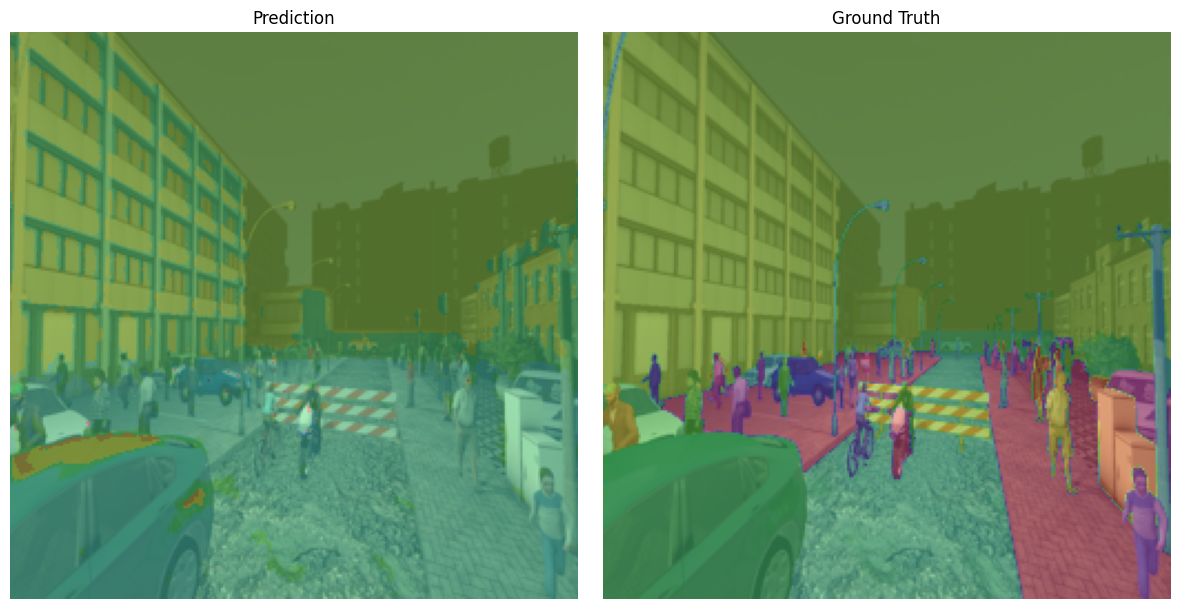

In [ ]:
max_show = 1
imgs, segs = next(val_gen)
pred = model.predict(imgs)

for i in range(max_show):
    _p = give_color_to_seg_img(np.argmax(pred[i], axis=-1))
    _s = give_color_to_seg_img(np.argmax(segs[i], axis=-1))

    predimg = cv2.addWeighted(imgs[i]/255, 0.5, _p, 0.5, 0)
    trueimg = cv2.addWeighted(imgs[i]/255, 0.5, _s, 0.5, 0)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.title("Prediction")
    plt.imshow(predimg)
    plt.axis("off")
    
    plt.subplot(122)
    plt.title("Ground Truth")
    plt.imshow(trueimg)
    plt.axis("off")
    
    plt.tight_layout()
    plt.savefig("pred_{}.png".format(i), dpi=150)
    plt.show()


In [ ]:
print(history.history.keys())  # Print available metrics
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate_generator(val_gen, steps=num_of_testing_samples // batch_size)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


AttributeError: ignored

Epoch 1/10
65/65 [==============================] - ETA: 0s - loss: 1.2384 - accuracy: 0.5893
Epoch 1: val_accuracy did not improve from 0.58626
65/65 [==============================] - 69s 1s/step - loss: 1.2384 - accuracy: 0.5893 - val_loss: 1.2870 - val_accuracy: 0.5826
Epoch 2/10
65/65 [==============================] - ETA: 0s - loss: 1.2511 - accuracy: 0.5963
Epoch 2: val_accuracy improved from 0.58626 to 0.60503, saving model to best-model-fcn.hdf5
65/65 [==============================] - 79s 1s/step - loss: 1.2511 - accuracy: 0.5963 - val_loss: 1.2366 - val_accuracy: 0.6050
Epoch 3/10
65/65 [==============================] - ETA: 0s - loss: 1.2017 - accuracy: 0.6173
Epoch 3: val_accuracy improved from 0.60503 to 0.60692, saving model to best-model-fcn.hdf5
65/65 [==============================] - 70s 1s/step - loss: 1.2017 - accuracy: 0.6173 - val_loss: 1.3449 - val_accuracy: 0.6069
Epoch 4/10
65/65 [==============================] - ETA: 0s - loss: 1.1806 - accuracy: 0.6291
Ep

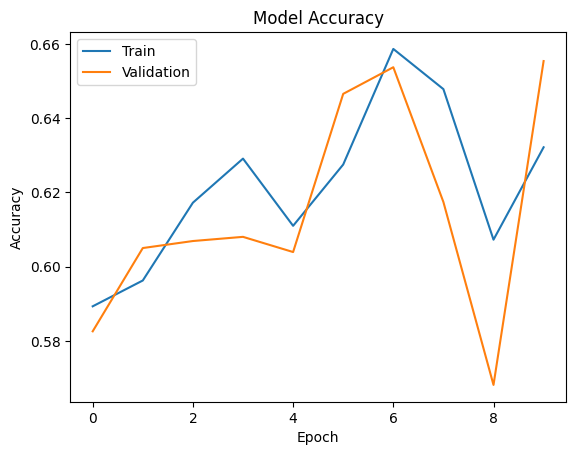

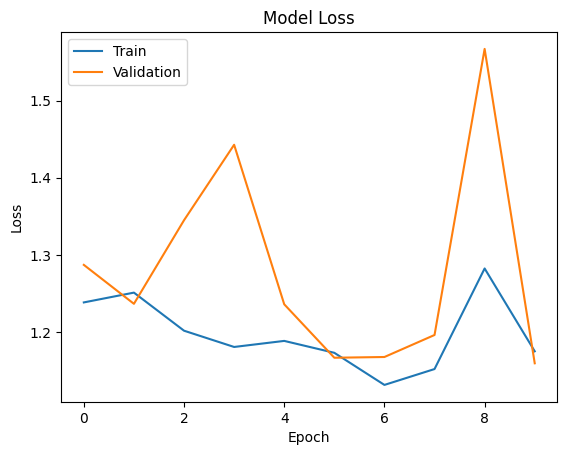

<ipython-input-35-5ebe3856859e>:31: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_accuracy = model.evaluate_generator(val_gen, steps=num_of_testing_samples // batch_size)


Validation Loss: 1.1590614318847656
Validation Accuracy: 0.6547070741653442


In [ ]:
import matplotlib.pyplot as plt

# ... existing code ...

# Fit the model and store the history
history = model.fit(train_gen, epochs=10, steps_per_epoch=num_of_training_samples // batch_size,
                    validation_data=val_gen, validation_steps=num_of_testing_samples // batch_size,
                    callbacks=callbacks_list, use_multiprocessing=True)

# Print available metrics
print(history.history.keys())

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate_generator(val_gen, steps=num_of_testing_samples // batch_size)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


In [ ]:
import shutil

source_path = "/content/pred_0.png"
destination_path = "/content/drive/MyDrive/ParametersDeepLearning/notebook5/pred_0.png"

shutil.copyfile(source_path, destination_path)


'/content/drive/MyDrive/ParametersDeepLearning/notebook5/pred_0.png'